### Aiding the implementation and evaluation of the classifiers with utility functions

#### Display correlations among the attributes

In [2]:
def display_corr(df, corr_threshold = 0.8):
    print('Correlations')
    print("Att. A\tAtt. B\tCorr(A,B)")
    for i in range(0, len(df.columns)):
        for j in range(i+1, len(df.columns)):
            corr = df[df.columns[i]].corr(df[df.columns[j]])
            if  corr > corr_threshold:
                print(df.columns[i] + "\t" + df.columns[j] + "\t" + '{:.4f}'.format(corr))

#### Plot the whole array of scatter plots

In [3]:
def corr_plot(label, label_source):
    nrows, ncols = 5, 6
    index = 0
    f, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(50,30))
    for i in range(len(cs_num_columns)):
        for j in range(i+1,len(cs_num_columns)):
            axs[int(index/ncols)][index%ncols].scatter(test_set.iloc[:, i].values, test_set.iloc[:, j].values, c=label, s=25, cmap='cividis')
            axs[int(index/ncols)][index%ncols].set_title('Correlation of ' + cs.columns[i] + ' and ' + cs.columns[j], fontdict={'fontsize': 'xx-large', 'fontweight' : 'bold'})
            axs[int(index/ncols)][index%ncols].set_xlabel(cs.columns[i], fontdict={'fontsize': 'xx-large', 'fontweight' : 'bold'})
            axs[int(index/ncols)][index%ncols].set_ylabel(cs.columns[j], fontdict={'fontsize': 'xx-large', 'fontweight' : 'bold'})
            index = index + 1
    for i in range(int(index/ncols),nrows):
        for j in range(index%ncols,ncols):
            axs[i][j].remove()
    plt.suptitle(("Visualization of the " + label_source +  " with respect to different feature spaces"), fontsize=28, fontweight='bold')
    plt.show()

#### Print the classification scores

In [4]:
def report_scores(test_label, test_pred):
    print(classification_report(test_label, 
                            test_pred, 
                            target_names=['0', '1']))

#### Identify the misclassification of a classifier

In [5]:
def spot_errors(test_label, test_pred):
    spot_errors = []
    for i in range(len(test_label)):
        if test_label[i] != test_pred[i]:
            spot_errors.append('darkred')
        else:
            spot_errors.append('darkgray')
    return spot_errors

#### Compares the true labels with the one predicted by a classifier while displaying the misclassification

In [6]:
def classification_visualizer(test_set, test_label, test_pred, classifier_name):
    f, axs = plt.subplots(nrows=1, ncols=3, figsize=(24,8))
    a, b = 'col_1', 'col_2'
    errors = spot_errors(test_label, test_pred)
    labels = [test_label, test_pred, errors]
    titles = ['True Labels', 'Predicted Labels', 'Misclassifications']

    for i in range(3):
        axs[i].scatter(test_set[a], test_set[b], c=labels[i], s=20, cmap='cividis')
        axs[i].set_title(titles[i])
        axs[i].set_xlabel(a, fontdict={'fontsize': 'large'})
        axs[i].set_ylabel(b, fontdict={'fontsize': 'large'})

    plt.suptitle(('Visualization of the ' + classifier_name + ' classifier on the test set'),
                 fontsize=24, fontweight='bold')

    plt.show()

#### Plot the confusion matrix of a classifier

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#compute and plot the confusion matrix 
def plot_c_matrix(test_set, test_label, test_pred, classifier, classifier_name, axs=None):
    cm = confusion_matrix(test_label, test_pred)
    if axs:
        plot_confusion_matrix(classifier, test_set, test_label, ax=axs)
    else:
        plot_confusion_matrix(classifier, test_set, test_label)
    plt.title('Confusion matrix of ' + classifier_name)
    plt.show() 

#### Plot the decision boundary of a classifier

In [53]:
import itertools
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

#compute and plot the decision boundary

def plot_decision_boundary(train_set, train_label, classifier, classifier_name, axs=None):
    X = train_set.values
    y = np.array(train_label)
    
    pca = PCA(n_components = 2)
    X = pca.fit_transform(X)
    gs = gridspec.GridSpec(2, 2)
    fig = plt.figure(figsize=(20,10))

    labels = [classifier_name]
    for clf, lab, grd in zip([classifier],
                         labels,
                         itertools.product([0, 1], repeat=2)):

        clf.fit(X, y)
        ax = plt.subplot(gs[grd[0], grd[1]])
        if axs:
            fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2, ax=axs)
        else:
            fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
        plt.title('Decision boundary of ' + lab)

### Import basic libraries

In [9]:
import statistics 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import scikitplot as skplt
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

### Import dataset

In [10]:
col_names = ['class', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'Id']
monk_train = pd.read_csv(f"datasets/monks/monks-1.train", sep=" ", names=col_names)
monk_train.set_index('Id', inplace=True)

# Labels creation - Dropping the "class" column from the Monk dataset: this represents the target y.
labels = monk_train['class']
monk_train.drop(columns=['class'], inplace=True)
labels = pd.Series(labels).to_numpy()  # from pd Series into numpy array
labels = np.expand_dims(labels, 1)  # add a flat dimension

"""One-Hot Encoding"""
encoder = OneHotEncoder().fit(monk_train)
monk_dataset = encoder.transform(monk_train).toarray()

# Training and Validetion sets split
train_X, val_X, train_y, val_y = train_test_split(monk_train, labels, test_size=0.30)

## Neural models



### Keras Feed-Forward Neural Network

In our case, we want the output layer to create 2 output values, one for each class. The output value with the largest value will be taken as the class predicted by the model.

We use a *softmax* activation function in the output layer. This is to ensure the output values are in the range of 0 and 1 and may be used as predicted probabilities.

#### Import libraries

In [11]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scipy.stats import uniform
from scipy.stats import randint

#### Grid search
In order to perform the grid search on our Neural Network we need the help of a model called Keras Classifier.

In [12]:
# define baseline model
def baseline_model(optimizer = 'SGD', init_mode='glorot_uniform', activation='relu', neurons=3, loss='binary_crossentropy'): #specify parameters so that we can do grid search
    # create model
    model = Sequential()
    model.add(Dense(neurons, kernel_initializer=init_mode, activation=activation)) # hidden layer
    model.add(Dense(2, kernel_initializer=init_mode, activation='softmax')) #output layer
    # Compile model
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model

In [13]:
# create model
nn = KerasClassifier(build_fn=baseline_model, verbose=0)

In this case we would have liked to perform a more complete search to find the best parameter configuration for the Neural Network, but the excessive complexity (and previous experience with the SVM model) led us to select fewer possible values ​​for the parameters, as well as to fix some.

In [36]:
#Tune Batch Size and Number of Epochs
batch_size = [1, 16, 32, 64]
epochs = [300, 500, 800]

# Tune the Training Optimization Algorithm
optimizer = ['SGD'] # Tune the Training Optimization Algorithm

#Tune the Neuron Activation Function
activation = ['softmax', 'relu', 'sigmoid']

#Tune the Number of Neurons in the Hidden Layer
neurons = randint(2, 4)

#Tune the Loss function
loss = ['binary_crossentropy', 'mean_squared_error']

param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer,
                  activation=activation, neurons=neurons, loss=loss) 

grid = RandomizedSearchCV(estimator=nn, param_distributions=param_grid, n_iter=100, cv=3, verbose=5)
#y_train = np.asarray(train_label).astype('float32').reshape((-1,1))
grid_result = grid.fit(train_X, train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.069, total=   0.8s
[CV] activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.483, total=   0.8s
[CV] activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV]  activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.393, total=   0.9s
[CV] activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s remaining:    0.0s


[CV]  activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.586, total=   1.3s
[CV] activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s remaining:    0.0s


[CV]  activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.414, total=   1.4s
[CV] activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.571, total=   1.4s
[CV] activation=sigmoid, batch_size=16, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=16, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=16, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=16, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=16, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=sigmoid, batch_size=16, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.2s
[CV] activation=sigmoid, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=sigmoid, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=32, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=32, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=32, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=32, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=32, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=softmax, batch_size=32, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=sigmoid, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=64, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=64, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.138, total=   1.7s
[CV] activation=softmax, batch_size=64, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=64, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.000, total=   1.5s
[CV] activation=softmax, batch_size=64, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=64, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.357, total=   1.5s
[CV] activation=sigmoid, batch_size=1, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=1, epochs=300, loss=binary_c

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=sigmoid, batch_size=1, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=sigmoid, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.310, total=   1.4s
[CV] activation=relu, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.517, total=   1.4s
[CV] activation=relu, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.000, total=   1.5s
[CV] activation=relu, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=2

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=relu, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=softmax, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=1, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=1, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.517, total=  14.6s
[CV] activation=relu, batch_size=1, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=1, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.483, total=  17.9s
[CV] activation=relu, batch_size=1, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=1, epochs=500, loss=mean_squared_error, neurons=3, 

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=relu, batch_size=16, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=32, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=32, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.345, total=   2.1s
[CV] activation=softmax, batch_size=32, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=32, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.000, total=   2.0s
[CV] activation=softmax, batch_size=32, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=32, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.036, total=   2.0s
[CV] activation=relu, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=32, epochs=800, loss=binary_crossent

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=relu, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=relu, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=1, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=1, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.414, total=   9.3s
[CV] activation=relu, batch_size=1, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=1, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.483, total=   9.3s
[CV] activation=relu, batch_size=1, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=1, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.679, total=   9.4s
[CV] activation=sigmoid, batch_size=16, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=16, epochs=800, loss=binary_crossentropy, neurons=2, o

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=sigmoid, batch_size=16, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=1, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=1, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.207, total=  24.5s
[CV] activation=relu, batch_size=1, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=1, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.310, total=  23.9s
[CV] activation=relu, batch_size=1, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=1, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.429, total=  25.0s
[CV] activation=relu, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, opti

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=relu, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=1, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=1, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=1, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=relu, batch_size=1, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.3s
[CV] activation=relu, batch_size=1, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=1, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=32, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=32, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.621, total=   1.5s
[CV] activation=sigmoid, batch_size=32, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=32, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.138, total=   1.5s
[CV] activation=sigmoid, batch_size=32, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=32, epochs=500, loss=mean_squared_error,

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=softmax, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.621, total=   1.5s
[CV] activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.655, total=   1.7s
[CV] activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.036, total=   1.5s
[CV] activation=softmax, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=500, loss=binary_crossentropy, neu

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=softmax, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.345, total=   1.0s
[CV] activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.069, total=   1.0s
[CV] activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neuro

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=softmax, batch_size=32, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=16, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.345, total=   3.2s
[CV] activation=relu, batch_size=16, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.276, total=   3.4s
[CV] activation=relu, batch_size=16, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.071, total=   3.3s
[CV] activation=relu, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=2

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=relu, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=1, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=1, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.172, total=  10.4s
[CV] activation=softmax, batch_size=1, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=1, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.276, total=  10.1s
[CV] activation=softmax, batch_size=1, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=1, epochs=300, loss=mean_squared_error, ne

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=sigmoid, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=sigmoid, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=16, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=16, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=16, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=softmax, batch_size=16, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.069, total=   1.7s
[CV] activation=softmax, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.207, total=   1.6s
[CV] activation=softmax, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.750, total=   1.8s
[CV] activation=sigmoid, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=64, epochs=300, loss=binary

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=sigmoid, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=16, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.172, total=   3.0s
[CV] activation=softmax, batch_size=16, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.241, total=   2.9s
[CV] activation=softmax, batch_size=16, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.143, total=   3.0s
[CV] activation=softmax, batch_size=1, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=1, epochs=300, loss=binary_c

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=softmax, batch_size=1, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.310, total=   1.7s
[CV] activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.552, total=   1.4s
[CV] activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.143, total=   1.4s
[CV] activation=sigmoid, batch_size=64, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=64, epochs=500, loss=binary_crossentropy, neur

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=sigmoid, batch_size=64, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=16, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=16, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.241, total=   2.1s
[CV] activation=sigmoid, batch_size=16, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=16, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.207, total=   2.1s
[CV] activation=sigmoid, batch_size=16, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=16, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.250, total=   2.0s
[CV] activation=sigmoid, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=32, epochs=500, loss=binary

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=sigmoid, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=relu, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=64, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=64, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=64, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=relu, batch_size=64, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=relu, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=1, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=1, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.276, total=   8.9s
[CV] activation=softmax, batch_size=1, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=1, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.276, total=   8.9s
[CV] activation=softmax, batch_size=1, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=1, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.179, total=  10.0s
[CV] activation=sigmoid, batch_size=64, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=64, epochs=500, loss=mean_squared_err

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=sigmoid, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=16, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.517, total=   2.5s
[CV] activation=relu, batch_size=16, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.414, total=   2.7s
[CV] activation=relu, batch_size=16, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.393, total=   2.5s
[CV] activation=relu, batch_size=16, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=500, loss=mean_squared_error, neurons=3, 

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=relu, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=sigmoid, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=16, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=16, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=16, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=relu, batch_size=16, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=1, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=1, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=1, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=1, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=1, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=softmax, batch_size=1, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=64, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=64, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.483, total=   1.1s
[CV] activation=sigmoid, batch_size=64, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=64, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.379, total=   1.0s
[CV] activation=sigmoid, batch_size=64, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=64, epochs=500, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.464, total=   1.0s
[CV] activation=softmax, batch_size=1, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=1, epochs=300, loss=mean_squar

[CV]  activation=relu, batch_size=32, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.172, total=   1.9s
[CV] activation=relu, batch_size=32, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=32, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.000, total=   2.0s
[CV] activation=relu, batch_size=32, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=32, epochs=800, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.500, total=   1.8s
[CV] activation=relu, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, 

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=relu, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.621, total=   0.8s
[CV] activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.517, total=   1.0s
[CV] activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.536, total=   0.9s
[CV] activation=sigmoid, batch_size=64, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=64, epochs=500, loss=mean_squared_error, neurons=

[CV]  activation=relu, batch_size=32, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.214, total=   1.2s
[CV] activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.138, total=   1.3s
[CV] activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.414, total=   1.5s
[CV] activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.214, total=   1.5s
[CV] activation=softmax, batch_size=1, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=1, epochs=800, loss=binary_crossentropy, neurons

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=softmax, batch_size=1, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=sigmoid, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.586, total=   1.4s
[CV] activation=softmax, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.483, total=   1.4s
[CV] activation=softmax, batch_size=16, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=300, loss=mean_sq

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=relu, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=relu, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.483, total=   1.3s
[CV] activation=relu, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.138, total=   1.4s
[CV] activation=relu, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.393, total=   1.3s
[CV] activation=sigmoid, batch_size=32, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=32, epochs=300, loss=binary_crossentropy, neuron

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=sigmoid, batch_size=32, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=32, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=32, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.207, total=   1.2s
[CV] activation=sigmoid, batch_size=32, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=32, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.483, total=   0.9s
[CV] activation=sigmoid, batch_size=32, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=32, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.321, total=   0.9s
[CV] activation=softmax, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=64, epochs=300, loss=binary

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=softmax, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=softmax, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=relu, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=32, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=32, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=32, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=relu, batch_size=32, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=32, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=32, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=relu, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=64, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=relu, batch_size=64, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.552, total=   1.4s
[CV] activation=relu, batch_size=64, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.138, total=   1.5s
[CV] activation=relu, batch_size=64, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.464, total=   1.4s
[CV] activation=softmax, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=500, loss=binary_crossentropy,

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=softmax, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=sigmoid, batch_size=16, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=16, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=16, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=16, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=softmax, batch_size=16, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=1, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=1, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=1, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=1, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=1, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=sigmoid, batch_size=1, epochs=500, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=sigmoid, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.448, total=   1.3s
[CV] activation=sigmoid, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.172, total=   1.4s
[CV] activation=sigmoid, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=sigmoid, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.571, total=   1.7s
[CV] activation=softmax, batch_size=32, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=32, epochs=300, loss=mean_squ

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=softmax, batch_size=1, epochs=300, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=1, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=1, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.310, total=   8.6s
[CV] activation=softmax, batch_size=1, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=1, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.621, total=   8.1s
[CV] activation=softmax, batch_size=1, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=1, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.464, total=   8.7s
[CV] activation=relu, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=32, epochs=800, loss=binary_crossentropy

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=relu, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=64, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.207, total=   1.5s
[CV] activation=relu, batch_size=64, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.310, total=   1.6s
[CV] activation=relu, batch_size=64, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.429, total=   1.5s
[CV] activation=softmax, batch_size=64, epochs=300, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=64, epochs=300, loss=mean_squared_error, neurons=

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=softmax, batch_size=32, epochs=500, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.586, total=   1.9s
[CV] activation=softmax, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.000, total=   1.3s
[CV] activation=softmax, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=32, epochs=500, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.464, total=   1.3s
[CV] activation=softmax, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=32, epochs=800, loss=binary

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=softmax, batch_size=32, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=32, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=32, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=32, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=32, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=32, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=softmax, batch_size=32, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=64, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.241, total=   1.4s
[CV] activation=relu, batch_size=64, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.483, total=   1.5s
[CV] activation=relu, batch_size=64, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=800, loss=mean_squared_error, neurons=2, optimizer=SGD, score=0.500, total=   1.4s
[CV] activation=softmax, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD 
[CV]  activation=softmax, batch_size=64, epochs=300, loss=binary_crossentropy, neu

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=softmax, batch_size=64, epochs=300, loss=binary_crossentropy, neurons=3, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.517, total=   0.7s
[CV] activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.414, total=   0.8s
[CV] activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD 
[CV]  activation=relu, batch_size=64, epochs=300, loss=mean_squared_error, neurons=3, optimizer=SGD, score=0.321, total=   0.8s
[CV] activation=softmax, batch_size=16, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD 


C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:

[CV]  activation=softmax, batch_size=16, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.2s
[CV] activation=softmax, batch_size=16, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s
[CV] activation=softmax, batch_size=16, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD 
[CV]  activation=softmax, batch_size=16, epochs=800, loss=binary_crossentropy, neurons=2, optimizer=SGD, score=nan, total=   0.1s


In [37]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.557882 using {'activation': 'relu', 'batch_size': 64, 'epochs': 300, 'loss': 'mean_squared_error', 'neurons': 2, 'optimizer': 'SGD'}


#### Run again the NN with the best configuration of parameters

In [79]:
# define baseline model
def baseline_model(optimizer = 'SGD', init_mode='glorot_uniform', activation='relu', dropout_rate=0.2, neurons=2, loss='mean_squared_error'): #specify parameters so that we can do grid search
    # create model
    model = Sequential()
    model.add(Dense(neurons, kernel_initializer=init_mode, activation=activation)) # hidden
    model.add(Dense(2, kernel_initializer=init_mode, activation='tanh')) # output
    # Compile model
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model

In [80]:
# create model
nn = KerasClassifier(build_fn=baseline_model, verbose=0)

In [81]:
history = nn.fit(train_X.values, train_y,
                    epochs=300,
                    batch_size=64,
                    validation_split=0.3)

In [82]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

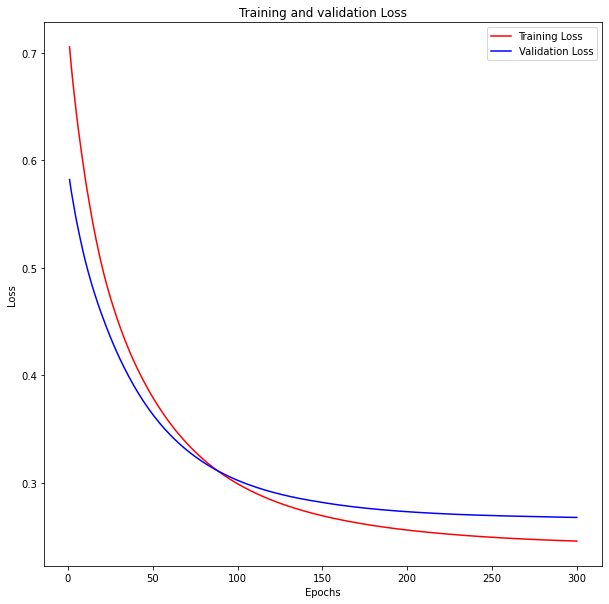

In [83]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'b', label='Training Loss', c='r')
plt.plot(epochs, val_loss, 'b', label='Validation Loss', c='b')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

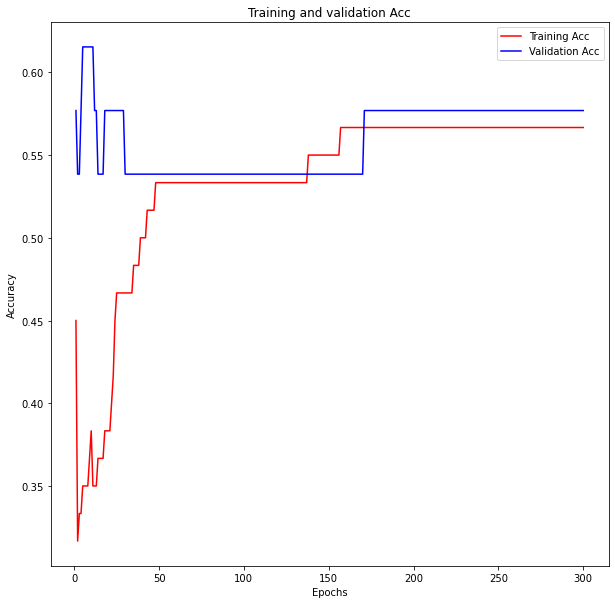

In [84]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training Acc', c='r')
plt.plot(epochs, val_acc, 'b', label='Validation Acc', c='b')
plt.title('Training and validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From the curve we can observe how the accuracy improves both for training and for the test set, even if its zig-zag behavior suggests that the learning is good but not optimal.

In [20]:
pred_nn = nn.predict(val_X)

C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


##### Model performance on the test set

In [21]:
#compute the performance of the model
report_scores(val_y, pred_nn)

              precision    recall  f1-score   support

           0       0.33      0.05      0.08        22
           1       0.40      0.88      0.55        16

    accuracy                           0.39        38
   macro avg       0.37      0.46      0.31        38
weighted avg       0.36      0.39      0.28        38



The accuracy of the model is good and, again, the classes that confirm to have the best values of the other metrics are low-spending and high-spending

##### Visualization of the classifier results via scatterplots

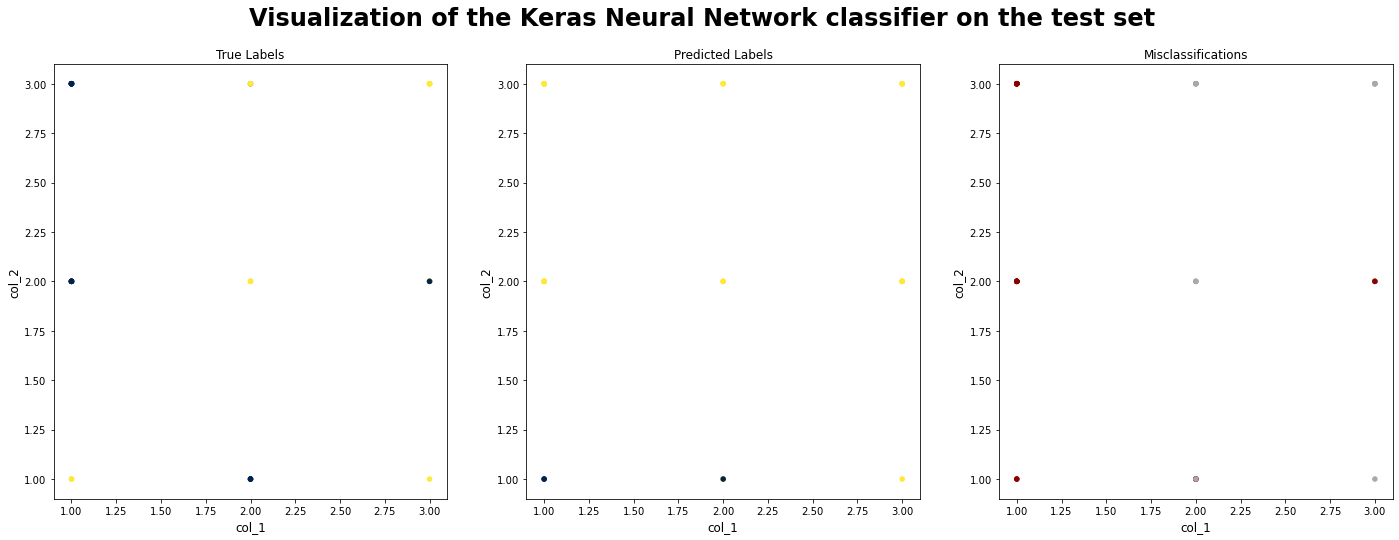

In [22]:
classification_visualizer(val_X, val_y, pred_nn, 'Keras Neural Network')

The comparison between the two plots (true labels and those predicted by the model) as well as the visualization of the misclassified points, allows us to note that the Feed-forward NN is quite accurate as it did not make excessive errors in the prediction.

##### Confusion Matrix of the classifier

Unfortunately we cannot plot the confusion matrix for the Keras Classifiers, because this option is not supported by this model.

##### Visualization of the decision boundary of the classifier

C:\Users\Diletta\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


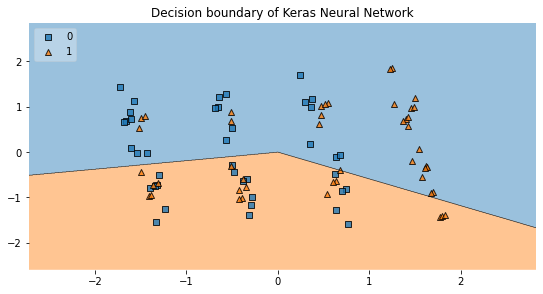

In [56]:
plot_decision_boundary(train_X, train_y.flatten(), nn, 'Keras Neural Network')

### Multi-layer Perceptron
[Scikit MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation. Is one of the (supervised) Neural network models of scikit-learn.

#### How the algorithm works
MLP is a supervised learning algorithm that learns a function $f(\cdot): R^m \rightarrow R^o$
by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = x_1, x_2, ..., x_m$
and a target $y$, it can learn a non-linear function approximator for classification. 

#### Import libraries

In [25]:
from sklearn.neural_network import MLPClassifier

#### Grid search

In [26]:
parameter_space = {
    'hidden_layer_sizes': [2, 3, 4],
    'activation': ['tanh', 'relu', 'sigmoid', 'softmax'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'shuffle': [True, False],
    'momentum': [0.001, 0.003, 0.005, 0.008],
    'solver': ['sgd'],
    'batch_size': [1, 4, 8, 16, 64],
    'alpha': [0.0001, 0.005], #L2 penalty (regularization term) parameter
    'learning_rate': ['constant', 'exponential']
}

estimator = MLPClassifier(random_state=1, max_iter=300)

grid = GridSearchCV(estimator=estimator, param_grid=parameter_space, n_jobs=-1, cv=3)
grid_result = grid.fit(train_X, train_y)

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
print('Best setting parameters\n', grid.cv_results_['params'][0])
print('\nMean of this setting\n', grid.cv_results_['mean_test_score'][0], 
      '\n\nStandard Deviation (std) of this setting\n', grid.cv_results_['std_test_score'][0])

Best setting parameters
 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 1, 'hidden_layer_sizes': 2, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'momentum': 0.001, 'shuffle': True, 'solver': 'sgd'}

Mean of this setting
 0.6165845648604269 

Standard Deviation (std) of this setting
 0.04613800104508085


#### Fitting and running the model

In [30]:
mlp = MLPClassifier(random_state=1, max_iter=300, activation='tanh', hidden_layer_sizes=2,
    learning_rate_init=0.001, momentum = 0.001, solver='sgd', batch_size=1, alpha=0.0001)
mlp.fit(train_X, train_y)

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', batch_size=1, hidden_layer_sizes=2,
              max_iter=300, momentum=0.001, random_state=1, solver='sgd')

##### Training

In [31]:
#predict on the training set
train_pred_mlp = mlp.predict(train_X)

##### Validation

In [32]:
#predict on the test set
test_pred_mlp = mlp.predict(val_X)

##### Probabilities

In [33]:
test_pred_proba_mlp = mlp.predict_proba(val_X)
test_pred_proba_mlp

array([[0.29102074, 0.70897926],
       [0.33993317, 0.66006683],
       [0.69093825, 0.30906175],
       [0.68870128, 0.31129872],
       [0.66681806, 0.33318194],
       [0.68967338, 0.31032662],
       [0.66248235, 0.33751765],
       [0.09135928, 0.90864072],
       [0.68879562, 0.31120438],
       [0.35239046, 0.64760954],
       [0.60820105, 0.39179895],
       [0.55378339, 0.44621661],
       [0.16315574, 0.83684426],
       [0.48608498, 0.51391502],
       [0.22326534, 0.77673466],
       [0.6931882 , 0.3068118 ],
       [0.13517573, 0.86482427],
       [0.68815051, 0.31184949],
       [0.08961388, 0.91038612],
       [0.68670547, 0.31329453],
       [0.58371491, 0.41628509],
       [0.09498602, 0.90501398],
       [0.69355937, 0.30644063],
       [0.62028776, 0.37971224],
       [0.09257644, 0.90742356],
       [0.64359598, 0.35640402],
       [0.66309348, 0.33690652],
       [0.6857682 , 0.3142318 ],
       [0.44371397, 0.55628603],
       [0.66033437, 0.33966563],
       [0.

#### Evaluation

##### Model performance on the training set

In [34]:
#compute the performance of the model
print ('Model performance on train set: \n')
report_scores(train_y, train_pred_mlp)

Model performance on train set: 

              precision    recall  f1-score   support

           0       0.66      0.88      0.75        40
           1       0.85      0.61      0.71        46

    accuracy                           0.73        86
   macro avg       0.75      0.74      0.73        86
weighted avg       0.76      0.73      0.73        86



##### Model performance on the test set

In [35]:
#compute the performance of the model
print ('Model performance on test set: \n')
report_scores(val_y, test_pred_mlp)

Model performance on test set: 

              precision    recall  f1-score   support

           0       0.70      0.73      0.71        22
           1       0.60      0.56      0.58        16

    accuracy                           0.66        38
   macro avg       0.65      0.64      0.65        38
weighted avg       0.66      0.66      0.66        38



We can see from the results that this is a very powerful model, able to return good performances even for complex data contexts.

For this reason this classifier finds applications in diverse fields such as speech recognition, image recognition, and machine translation software, but thereafter faced strong competition from much simpler support vector machines. 

- Source: Neural networks. II. What are they and why is everybody so interested in them now?; Wasserman, P.D.; Schwartz, T.; Page(s): 10-15; IEEE Expert, 1988, Volume 3, Issue 1

##### Visualization of the classifier results via scatterplots

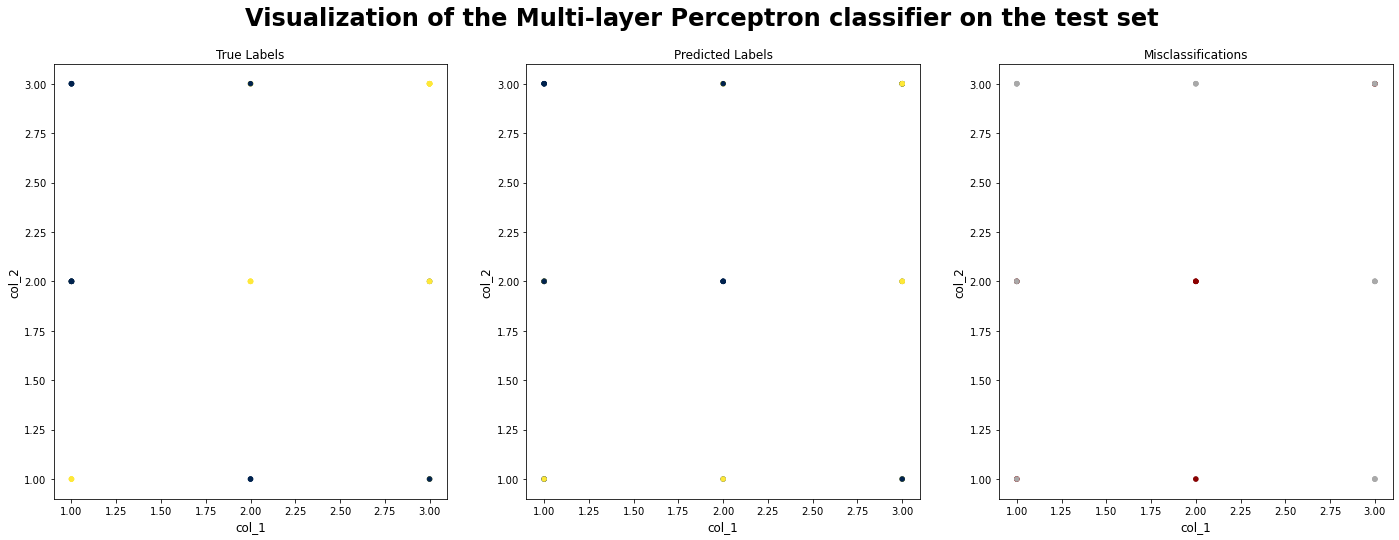

In [144]:
classification_visualizer(val_X, val_y, test_pred_mlp, 'Multi-layer Perceptron')

The misclassified points are very few: the fact that the prediction is really accurate confirms the power of this model.

##### Visualization of the decision boundary of the classifier

In [48]:
train_y_flat = train_y.flatten()

C:\Users\Diletta\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


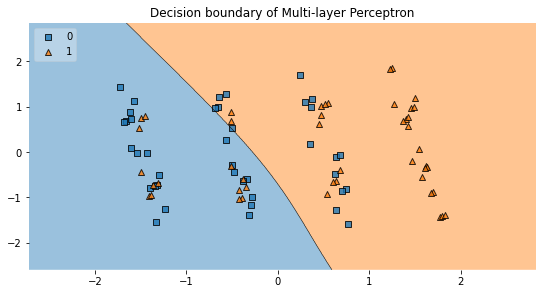

In [55]:
plot_decision_boundary(train_X, train_y_flat, mlp, 'Multi-layer Perceptron')

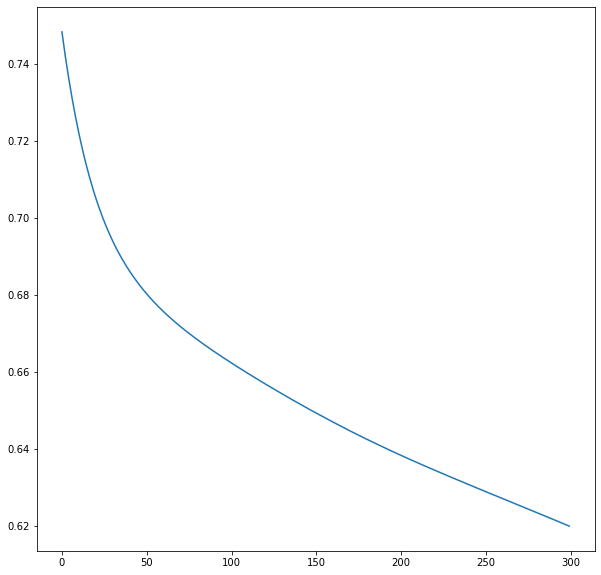

In [60]:
plt.plot(mlp.loss_curve_)

##### ROC curve of the classifier

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

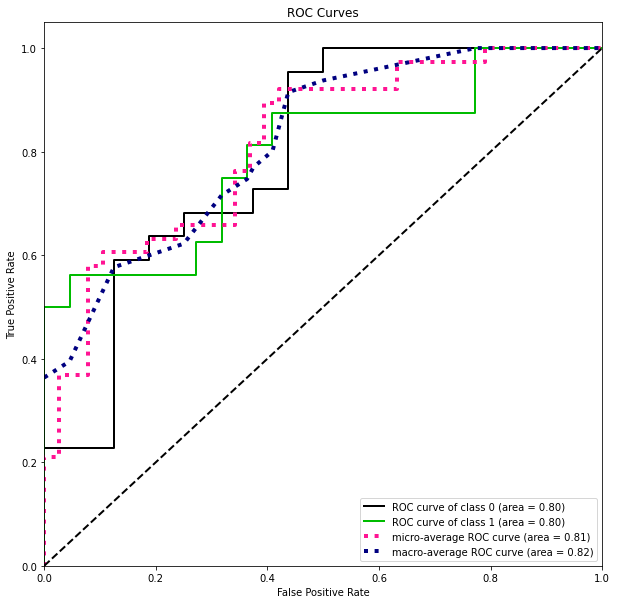

In [57]:
skplt.metrics.plot_roc(val_y, test_pred_proba_mlp)

The graph in question represents the high sensitivity, and therefore the low propensity to false positive classifications, of the neural network towards the dataset under analysis.

#### Comments on MLP classifier
One of the most important advantages of Multi-layer Perceptron is the capability to learn non-linear models. However, it has also some disadvantages to take into consideration:
- different random weight initializations can lead to different validation accuracy
- it requires tuning a lot of hyperparameters: grid-search process can be very time-consuming
- it is sensitive to feature scaling: for this reason, a pre-processing phase is needed.

##### Comments on optimizers for MLP
We know from literature that, for relatively large datasets, *Adam* is very robust. It usually converges quickly and gives pretty good performance. *SGD* with momentum or nesterov’s momentum, on the other hand, can perform better if learning rate is correctly tuned.